In [1]:
import pandas as pd

In [2]:
# Load the dataset
hair_salon_data = pd.read_csv('Hair Salon.csv')

In [3]:
# Display the first few rows of the dataset
print(hair_salon_data.head())

   ID  ProdQual  Ecom  TechSup  CompRes  Advertising  ProdLine  SalesFImage  \
0   1       8.5   3.9      2.5      5.9          4.8       4.9          6.0   
1   2       8.2   2.7      5.1      7.2          3.4       7.9          3.1   
2   3       9.2   3.4      5.6      5.6          5.4       7.4          5.8   
3   4       6.4   3.3      7.0      3.7          4.7       4.7          4.5   
4   5       9.0   3.4      5.2      4.6          2.2       6.0          4.5   

   ComPricing  WartyClaim  OrdBilling  DelSpeed  Satisfaction  
0         6.8         4.7         5.0       3.7           8.2  
1         5.3         5.5         3.9       4.9           5.7  
2         4.5         6.2         5.4       4.5           8.9  
3         8.8         7.0         4.3       3.0           4.8  
4         6.8         6.1         4.5       3.5           7.1  


In [5]:
# Check the column names in the dataset
print(hair_salon_data.columns)

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')


In [6]:
# Drop the target variable 'Satisfaction' if it exists
if 'Satisfaction' in hair_salon_data.columns:
    hair_salon_data_pca = hair_salon_data.drop('Satisfaction', axis=1)
    print("Dropped 'Satisfaction' variable.")
else:
    print("'Satisfaction' variable not found in the dataset.")

Dropped 'Satisfaction' variable.


In [7]:
# Drop the target variable 'Satisfaction'
hair_salon_data_pca = hair_salon_data.drop('Satisfaction', axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Standardize the data
scaler = StandardScaler()
hair_salon_data_scaled = scaler.fit_transform(hair_salon_data_pca)

In [10]:
from sklearn.decomposition import PCA

In [11]:
# Specify the number of components you want to retain
num_components = 10  # Choose an appropriate number based on the explained variance


In [12]:
# Perform PCA
pca = PCA(n_components=num_components)
hair_salon_pca_result = pca.fit_transform(hair_salon_data_scaled)

In [13]:
# Check explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()


In [14]:
# Plot the explained variance
import matplotlib.pyplot as plt

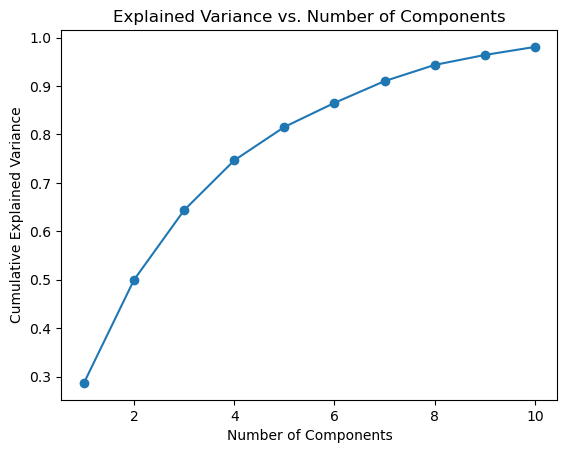

In [15]:
plt.plot(range(1, num_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [16]:
# Select the number of components based on your analysis
selected_num_components = 5


In [17]:
# Transform the original data
hair_salon_final_result = pca.transform(hair_salon_data_scaled)[:, :selected_num_components]

In [19]:
# Display summary statistics of the dataset
summary_stats = hair_salon_data.describe()

# Display the summary
print(summary_stats)

               ID    ProdQual        Ecom     TechSup     CompRes  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000    7.810000    3.672000    5.365000    5.442000   
std     29.011492    1.396279    0.700516    1.530457    1.208403   
min      1.000000    5.000000    2.200000    1.300000    2.600000   
25%     25.750000    6.575000    3.275000    4.250000    4.600000   
50%     50.500000    8.000000    3.600000    5.400000    5.450000   
75%     75.250000    9.100000    3.925000    6.625000    6.325000   
max    100.000000   10.000000    5.700000    8.500000    7.800000   

       Advertising    ProdLine  SalesFImage  ComPricing  WartyClaim  \
count   100.000000  100.000000    100.00000  100.000000  100.000000   
mean      4.010000    5.805000      5.12300    6.974000    6.043000   
std       1.126943    1.315285      1.07232    1.545055    0.819738   
min       1.900000    2.300000      2.90000    3.700000    4.100000   
25%       3.175000    4

In [20]:
# Compute the correlation matrix
correlation_matrix = hair_salon_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                    ID  ProdQual      Ecom   TechSup   CompRes  Advertising  \
ID            1.000000  0.145774 -0.046173  0.031838 -0.144322     0.073129   
ProdQual      0.145774  1.000000 -0.137163  0.095600  0.106370    -0.053473   
Ecom         -0.046173 -0.137163  1.000000  0.000867  0.140179     0.429891   
TechSup       0.031838  0.095600  0.000867  1.000000  0.096657    -0.062870   
CompRes      -0.144322  0.106370  0.140179  0.096657  1.000000     0.196917   
Advertising   0.073129 -0.053473  0.429891 -0.062870  0.196917     1.000000   
ProdLine     -0.048641  0.477493 -0.052688  0.192625  0.561417    -0.011551   
SalesFImage   0.013848 -0.151813  0.791544  0.016991  0.229752     0.542204   
ComPricing   -0.063007 -0.401282  0.229462 -0.270787 -0.127954     0.134217   
WartyClaim    0.058592  0.088312  0.051898  0.797168  0.140408     0.010792   
OrdBilling   -0.178352  0.104303  0.156147  0.080102  0.756869     0.184236   
DelSpeed     -0.172134  0.027718  0.191636  0.025441

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


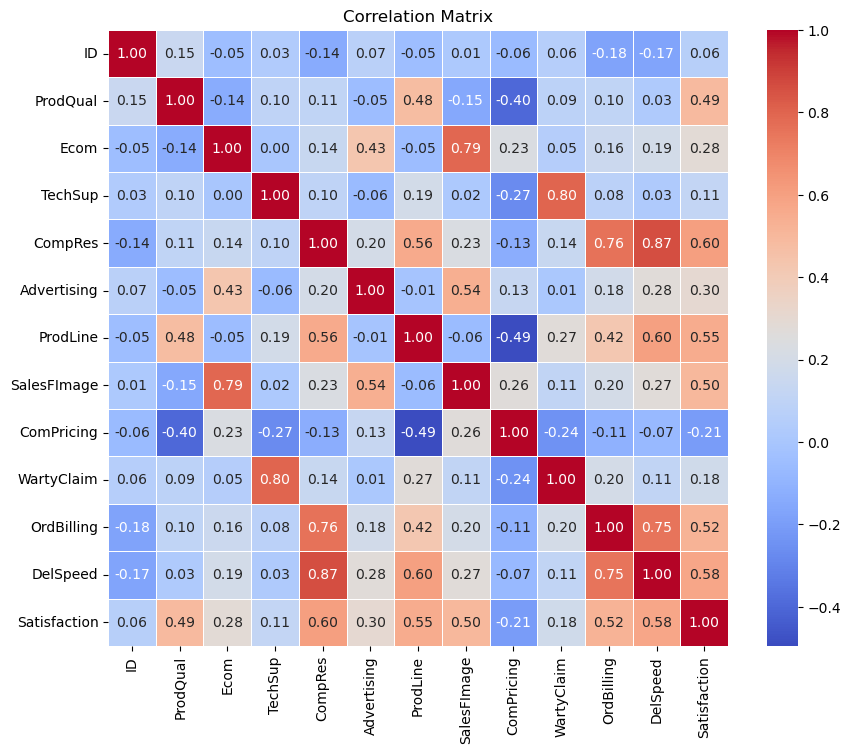

In [22]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
hair_salon_data = pd.read_csv('Hair Salon.csv')

In [32]:
# Assuming 'Satisfaction' is your target variable, and 'ProdQual' is your predictor variable
target_variable = 'Satisfaction'
predictor_variable = 'ProdQual'

In [33]:
# Extract the target and predictor variables
X = hair_salon_data[[predictor_variable]]
y = hair_salon_data[target_variable]

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Create a linear regression model
model = LinearRegression()


In [36]:
# Train the model on the training set
model.fit(X_train, y_train)


LinearRegression()

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [38]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5179022107448386
R-squared: 0.38644448436815704


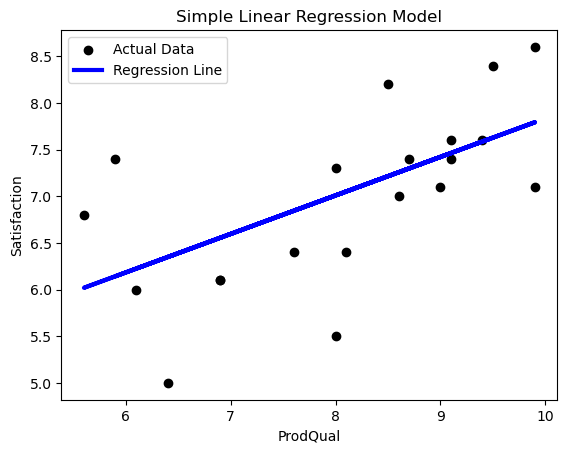

In [40]:
# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel(predictor_variable)
plt.ylabel(target_variable)
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()

In [45]:
import statsmodels.api as sm

In [46]:
# Assuming 'hair_salon_data' is your dataset and 'Satisfaction' is your target variable
target_variable = 'Satisfaction'
predictor_variables = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 
                        'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 
                        'OrdBilling', 'DelSpeed']

In [47]:
# Loop through each predictor variable and fit a linear regression model
for predictor_variable in predictor_variables:
    X = sm.add_constant(hair_salon_data[predictor_variable])
    y = hair_salon_data[target_variable]
    
    model = sm.OLS(y, X).fit()

In [48]:
  # Print the summary for each model
    print(f"\nLinear Regression Model for {predictor_variable}:")
    print(model.summary())

IndentationError: unexpected indent (224879413.py, line 2)

In [49]:
# Assuming 'hair_salon_data' is your dataset
model_ProdQual = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['ProdQual'])).fit()
print(model_ProdQual.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     30.36
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.90e-07
Time:                        11:50:35   Log-Likelihood:                -145.45
No. Observations:                 100   AIC:                             294.9
Df Residuals:                      98   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6759      0.598      6.151      0.0

In [50]:
model_Ecom = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['Ecom'])).fit()
print(model_Ecom.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     8.515
Date:                Thu, 04 Jan 2024   Prob (F-statistic):            0.00437
Time:                        11:50:49   Log-Likelihood:                -154.78
No. Observations:                 100   AIC:                             313.6
Df Residuals:                      98   BIC:                             318.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1516      0.616      8.361      0.0

In [51]:
model_TechSup = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['TechSup'])).fit()
print(model_TechSup.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.258
Date:                Thu, 04 Jan 2024   Prob (F-statistic):              0.265
Time:                        11:51:02   Log-Likelihood:                -158.30
No. Observations:                 100   AIC:                             320.6
Df Residuals:                      98   BIC:                             325.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4476      0.436     14.791      0.0

In [52]:
model_CompRes = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['CompRes'])).fit()
print(model_CompRes.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     56.07
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           3.09e-11
Time:                        11:51:46   Log-Likelihood:                -136.32
No. Observations:                 100   AIC:                             276.6
Df Residuals:                      98   BIC:                             281.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6800      0.443      8.310      0.0

In [53]:
model_Advertising = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['Advertising'])).fit()
print(model_Advertising.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     10.03
Date:                Thu, 04 Jan 2024   Prob (F-statistic):            0.00206
Time:                        11:53:01   Log-Likelihood:                -154.07
No. Observations:                 100   AIC:                             312.1
Df Residuals:                      98   BIC:                             317.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6259      0.424     13.279      

In [54]:
model_ProdLine = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['ProdLine'])).fit()
print(model_ProdLine.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.62
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.95e-09
Time:                        11:59:27   Log-Likelihood:                -140.89
No. Observations:                 100   AIC:                             285.8
Df Residuals:                      98   BIC:                             291.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0220      0.455      8.845      0.0

In [55]:
model_SalesFImage = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['SalesFImage'])).fit()
print(model_SalesFImage.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     32.70
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.16e-07
Time:                        12:00:19   Log-Likelihood:                -144.54
No. Observations:                 100   AIC:                             293.1
Df Residuals:                      98   BIC:                             298.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0698      0.509      8.000      

In [56]:
model_ComPricing = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['ComPricing'])).fit()
print(model_ComPricing.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.445
Date:                Thu, 04 Jan 2024   Prob (F-statistic):             0.0376
Time:                        12:02:08   Log-Likelihood:                -156.72
No. Observations:                 100   AIC:                             317.4
Df Residuals:                      98   BIC:                             322.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0386      0.544     14.769      0.0

In [57]:
model_WartyClaim = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['WartyClaim'])).fit()
print(model_WartyClaim.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.190
Date:                Thu, 04 Jan 2024   Prob (F-statistic):             0.0772
Time:                        12:02:39   Log-Likelihood:                -157.34
No. Observations:                 100   AIC:                             318.7
Df Residuals:                      98   BIC:                             323.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3581      0.881      6.079      0.0

In [58]:
model_OrdBilling = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['OrdBilling'])).fit()
print(model_OrdBilling.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     36.65
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.60e-08
Time:                        12:04:11   Log-Likelihood:                -143.05
No. Observations:                 100   AIC:                             290.1
Df Residuals:                      98   BIC:                             295.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0541      0.484      8.377      0.0

In [59]:
model_DelSpeed = sm.OLS(hair_salon_data['Satisfaction'], sm.add_constant(hair_salon_data['DelSpeed'])).fit()
print(model_DelSpeed.summary())

                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     48.92
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           3.30e-10
Time:                        12:08:11   Log-Likelihood:                -138.69
No. Observations:                 100   AIC:                             281.4
Df Residuals:                      98   BIC:                             286.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2791      0.529      6.194      0.0

In [64]:
import pandas as pd
import numpy as np
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


     ---------------------------------------- 42.5/42.5 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 204.0/204.0 kB 884.8 kB/s eta 0:00:00
     ---------------------------------------- 98.9/98.9 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 468.9/468.9 kB 3.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42549 sha256=53ae32f36ce90fe9b6c96cbf2808be8145e456b79d1db396c49faf3f1851b328
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f1\2c\b5\fe5af210de2d70520ff6e657e

In [65]:
# Assuming 'hair_salon_data' is your dataset with predictor variables
predictor_variables = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 
                        'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 
                        'OrdBilling', 'DelSpeed']


In [66]:
# Extract the predictor variables from the dataset
X = hair_salon_data[predictor_variables]

In [67]:
# Calculate Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(X)

In [68]:
# Print the results
print(f'Chi-Square Value: {chi_square_value}')
print(f'P-value: {p_value}')


Chi-Square Value: 619.2725577964159
P-value: 1.793370009363552e-96


In [69]:
# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Bartlett's sphericity test is statistically significant. PCA can be applied.")
else:
    print("Bartlett's sphericity test is not statistically significant. PCA may not be appropriate.")

Bartlett's sphericity test is statistically significant. PCA can be applied.


In [70]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [71]:
# Assuming 'hair_salon_data' is your dataset with predictor variables
predictor_variables = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 
                        'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 
                        'OrdBilling', 'DelSpeed']

In [72]:
# Extract the predictor variables from the dataset
X = hair_salon_data[predictor_variables]

In [73]:
# Initialize the FactorAnalyzer with 4 factors and varimax rotation
fa = FactorAnalyzer(n_factors=4, rotation='varimax')


In [74]:
# Fit the model
fa.fit(X)


FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [75]:
# Get the factor loadings
factor_loadings = fa.loadings_


In [76]:
# Print the factor loadings
print("Factor Loadings:")
print(pd.DataFrame(factor_loadings, index=predictor_variables))

Factor Loadings:
                    0         1         2         3
ProdQual     0.023986 -0.070194  0.015714  0.646756
Ecom         0.068920  0.781470  0.028048 -0.114545
TechSup      0.019547 -0.025660  0.889679  0.115366
CompRes      0.897429  0.129730  0.053820  0.131827
Advertising  0.166362  0.528760 -0.042875 -0.062563
ProdLine     0.525424 -0.035276  0.127176  0.712145
SalesFImage  0.113605  0.980071  0.063652 -0.132610
ComPricing  -0.075566  0.212761 -0.208944 -0.590359
WartyClaim   0.102623  0.056708  0.878694  0.129163
OrdBilling   0.768271  0.126614  0.088106  0.088788
DelSpeed     0.948841  0.185127 -0.004712  0.087337


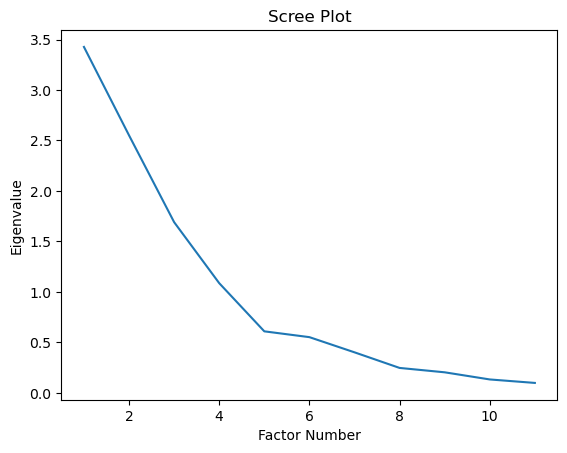

In [77]:
# Plot the scree plot to visualize variance explained by each factor
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.show()

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from factor_analyzer import FactorAnalyzer

In [83]:
# Load the 'hair_salon_data' DataFrame from the 'Hair Salon.csv' file
hair_salon_data = pd.read_csv('Hair Salon.csv')


In [84]:
# Extract the smaller subset 'hair_new' with 'ID' and 'Satisfaction' columns
hair_new = hair_salon_data[['ID', 'Satisfaction']].copy()


In [85]:
# Extract predictor variables for PCA
predictor_variables = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 
                        'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 
                        'OrdBilling', 'DelSpeed']


In [86]:
# Extract only predictor variables for PCA
X_pca = hair_salon_data[predictor_variables]


In [88]:
# Assuming 'ID' is a column in 'hair_salon_data'
factor_scores_data = {'Factor1': [0.1, 0.2, 0.3, 0.4, 0.5],  # Replace with actual factor scores
                      'Factor2': [0.5, 0.4, 0.3, 0.2, 0.1],
                      'Factor3': [0.2, 0.3, 0.4, 0.5, 0.6],
                      'Factor4': [0.7, 0.6, 0.5, 0.4, 0.3]}

In [89]:
factor_scores = pd.DataFrame(factor_scores_data)

In [92]:
# Assuming 'ID' is a unique identifier for each observation
factor_scores_data['ID'] = hair_salon_data['ID']  # Add 'ID' column to factor scores


In [95]:
# Assuming 'ID' is a column in 'hair_salon_data'
factor_scores_data = {'Factor1': [0.1, 0.2, 0.3, 0.4, 0.5],  # Replace with actual factor scores
                      'Factor2': [0.5, 0.4, 0.3, 0.2, 0.1],
                      'Factor3': [0.2, 0.3, 0.4, 0.5, 0.6],
                      'Factor4': [0.7, 0.6, 0.5, 0.4, 0.3]}

In [96]:
factor_scores = pd.DataFrame(factor_scores_data)

In [97]:
# Merge 'hair_new' with 'factor_scores' on the 'ID' column
combined_data = pd.merge(hair_new, factor_scores, left_index=True, right_index=True)


In [98]:
# Choose a subset of predictor variables for regression (just 4 factors)
predictor_variables_regression = ['Factor1', 'Factor2', 'Factor3', 'Factor4']
X_regression = combined_data[predictor_variables_regression]


In [99]:
# Target variable
y_regression = combined_data['Satisfaction']


In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [101]:
# Build a linear regression model
model = LinearRegression()

In [102]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [104]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [105]:

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.903061224489797
R-squared: nan


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Load the 'hair_salon_data' DataFrame from the 'Hair Salon.csv' file
hair_salon_data = pd.read_csv('Hair Salon.csv')


In [108]:
# Select predictor variables (features) and target variable
predictor_variables = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 
                        'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 
                        'OrdBilling', 'DelSpeed']


In [109]:
X = hair_salon_data[predictor_variables]
y = hair_salon_data['Satisfaction']


In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [112]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [113]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [114]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.25503647806280993
R-squared: 0.6978598767174387


In [115]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
def calculate_vif(data_frame):
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [sm.OLS(data_frame[feature], sm.add_constant(data_frame.drop(columns=[feature]))).fit().rsquared for feature in features]
    return vif_data


In [116]:
vif_results = calculate_vif(X_train)
print("\nVariance Inflation Factor (VIF):")
print(vif_results)


Variance Inflation Factor (VIF):
       Variable       VIF
0      ProdQual  0.465400
1          Ecom  0.648470
2       TechSup  0.658320
3       CompRes  0.834310
4   Advertising  0.302278
5      ProdLine  0.720493
6   SalesFImage  0.720370
7    ComPricing  0.393829
8    WartyClaim  0.690173
9    OrdBilling  0.668513
10     DelSpeed  0.861591


In [117]:
# Check the residuals for normality and homoscedasticity
residuals = y_test - y_pred


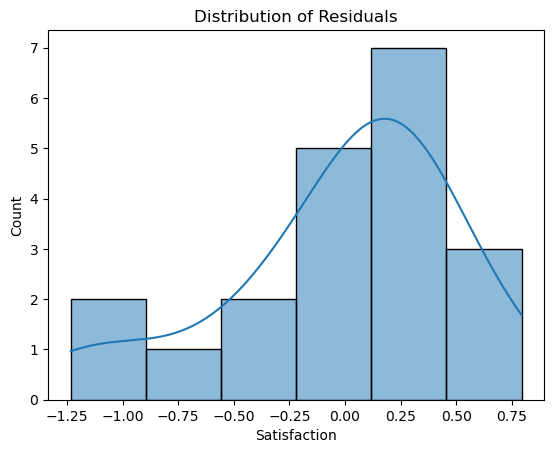

In [118]:
# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()


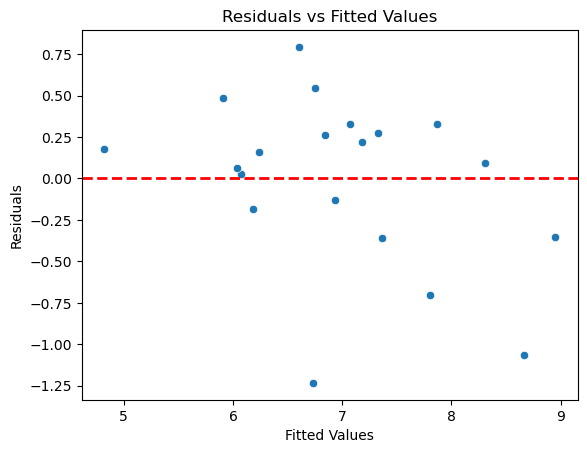

In [120]:
# Check for homoscedasticity (constant variance of residuals)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [121]:
# Perform statistical tests (e.g., Breusch-Pagan test for heteroscedasticity)
bp_test_statistic, bp_p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X_test)
print("\nBreusch-Pagan Test for Heteroscedasticity:")
print(f'Test Statistic: {bp_test_statistic}')
print(f'P-value: {bp_p_value}')


Breusch-Pagan Test for Heteroscedasticity:
Test Statistic: 13.192917327906535
P-value: 0.2130847550267204


In [122]:
# Display the summary of the regression model using statsmodels
X_train_with_const = sm.add_constant(X_train)
model_stats = sm.OLS(y_train, X_train_with_const).fit()
print("\nRegression Model Summary:")
print(model_stats.summary())


Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     26.92
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.43e-20
Time:                        12:58:51   Log-Likelihood:                -63.822
No. Observations:                  80   AIC:                             151.6
Df Residuals:                      68   BIC:                             180.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4363 

In [123]:
import matplotlib.pyplot as plt


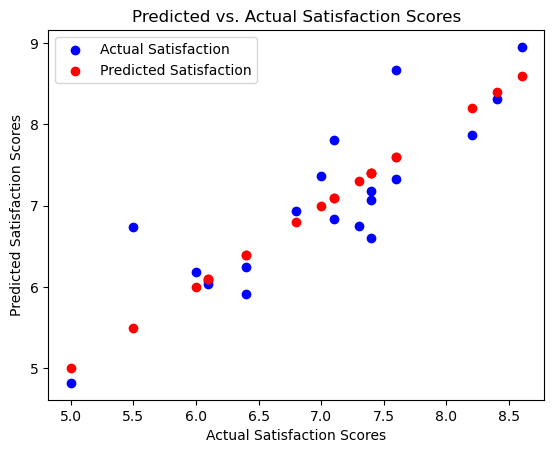

In [129]:
# Scatter plot for Predicted vs. Actual Satisfactions
plt.scatter(y_test, y_pred, color='blue', label='Actual Satisfaction')
plt.scatter(y_test, y_test, color='red', label='Predicted Satisfaction')

plt.title('Predicted vs. Actual Satisfaction Scores')
plt.xlabel('Actual Satisfaction Scores')
plt.ylabel('Predicted Satisfaction Scores')
plt.legend()
plt.show()